In [1]:
import matplotlib as mpl
import sys
sys.path.append("/Users/yao/Smilei")
import happi
import numpy as np
import matplotlib.pyplot as plt

jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd
jet_vals = jetcmap(np.arange(9)) #extract those values as an array 
jet_vals[0] = [1.0, 1, 1.0, 1] #change the first value 
jet_vals[8] = [0.0, 0, 0.0, 1] #change the first value 
newcmap = mpl.colors.LinearSegmentedColormap.from_list("mine", jet_vals) 

from matplotlib import font_manager

font_dirs = ['/Users/yao/Documents/Calibri and Cambria Fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
# plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['font.family'] = 'Times New Roman'

plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)
plt.rc('legend', fontsize=12)

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_46444/2496580637.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd


In [2]:
# load electron spectra measurement

# shot 105, 30 nm SiN
ene105 = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/ELI/Xray-April2025/e_spectra/ene105.txt') # 30 nm SiN
num105 = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/ELI/Xray-April2025/e_spectra/num105.txt')

# shot 102, 150 nm SiN
ene102 = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/ELI/Xray-April2025/e_spectra/ene102.txt') # 150 nm SiN
num102 = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/ELI/Xray-April2025/e_spectra/num102.txt')

# shot80-81, 2 um Au
ene8081 = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/ELI/Xray-April2025/e_spectra/ene8081.txt') # 2 um Au
num8081 = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/ELI/Xray-April2025/e_spectra/num8081.txt')

# shot78-79, 3 um Au
ene7879 = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/ELI/Xray-April2025/e_spectra/ene7879.txt') # 3 um Au
num7879 = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/ELI/Xray-April2025/e_spectra/num7879.txt')

# shot72-73, 10 um Au
ene7273 = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/ELI/Xray-April2025/e_spectra/ene7273.txt') # 10 um Au
num7273 = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/ELI/Xray-April2025/e_spectra/num7273.txt')

# shot 74-75, 25 um W
ene7475 = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/ELI/Xray-April2025/e_spectra/ene7475.txt') # 25 um W
num7475 = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/ELI/Xray-April2025/e_spectra/num7475.txt')

# shot 76-77, 50 um Au
ene7677 = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/ELI/Xray-April2025/e_spectra/ene7677.txt') # 50 um Au
num7677 = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/ELI/Xray-April2025/e_spectra/num7677.txt')



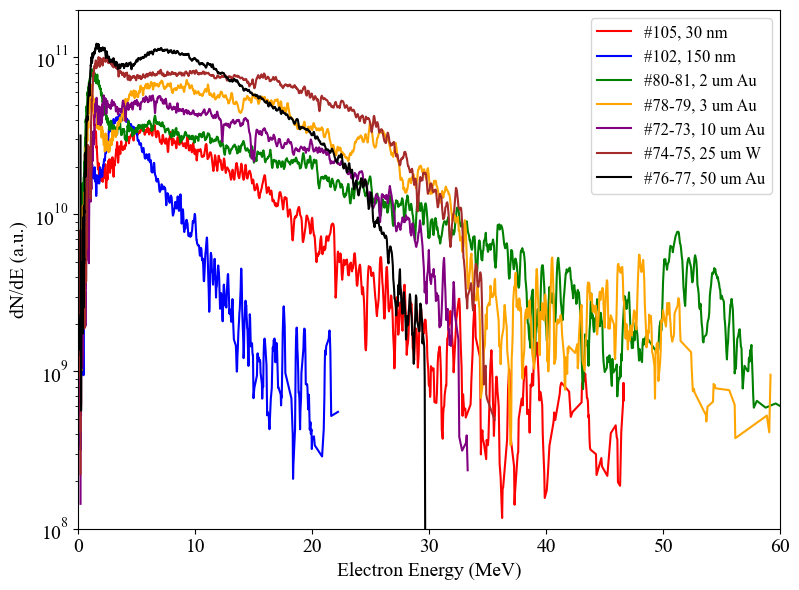

In [3]:
# have a quick look

# Set font to Calibri and increase font sizes
# plt.rcParams.update({
#     'font.family': 'Calibri',
#     'font.size': 24,
#     'axes.titlesize': 28,
#     'axes.labelsize': 24,
#     'legend.fontsize': 16,
#     'xtick.labelsize': 24,
#     'ytick.labelsize': 24
# })

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(ene105, num105, linestyle='-', color='red', label="#105, 30 nm")
plt.plot(ene102, num102, linestyle='-', color='blue', label="#102, 150 nm")
plt.plot(ene8081, num8081, linestyle='-', color='green', label="#80-81, 2 um Au")
plt.plot(ene7879, num7879, linestyle='-', color='orange', label="#78-79, 3 um Au")
plt.plot(ene7273, num7273, linestyle='-', color='purple', label="#72-73, 10 um Au")
plt.plot(ene7475, num7475, linestyle='-', color='brown', label="#74-75, 25 um W")
plt.plot(ene7677, num7677, linestyle='-', color='black', label="#76-77, 50 um Au")
# plt.title("Gray Value vs Distance")
plt.xlabel("Electron Energy (MeV)")
plt.ylabel("dN/dE (a.u.)")
plt.legend()
# plt.grid(True)
plt.yscale('log')
plt.tight_layout()

plt.xlim(0, 60)
plt.ylim(1e8, 2e11)
plt.show()

In [4]:
# proton cutoff energy vs. target thickness

# plot each material's data separately for clearity 07/07/2025
# update the maximum energy data by rechecking the RCF layers one-by-one
# thickness and cutoff energy

thickness_SiN     = np.array([30.0, 150.0, 200.0, 500.0])
cutoff_energy_SiN = np.array([23.2, 23.2,  16.75,  17.6])
err_SiN           = np.array([4.35, 4.35,    1.9,   2.4])  # Adding error values for SiN
# Create (2, N) array for asymmetric error bars
yerr_SiN = np.vstack((np.zeros_like(err_SiN), err_SiN))

thickness_Al      = np.array([800., 1500., 2000., 3000., 20000., 50000.,])
cutoff_energy_Al  = np.array([17.6, 22.2,   31.4, 18.65, 16.75,  16.75,])
err_Al            = np.array([ 2.4,  2.1,    3.6,  4.55,   1.9,    1.9,])  # Adding error values for Al
# Create (2, N) array for asymmetric error bars
yerr_Al = np.vstack((np.zeros_like(err_Al), err_Al))

# thickness_Au      = np.array([2000.0, 10000.0, 25000])#, 50000.0, 125000.0])
# cutoff_energy_Au  = np.array([ 18.65,   18.65,  22.2])#,     1.1,      1.1])
# err_Au            = np.array([  4.55,    4.55,   2.1])#,     2.1,      2.1])  # Adding error values for Au

#remove the 2 um Au data 19/11/2025
thickness_Au      = np.array([10000.0, 25000])#, 50000.0, 125000.0])
cutoff_energy_Au  = np.array([ 18.65,  22.2])#,     1.1,      1.1])
err_Au            = np.array([  4.55,   2.1])#,     2.1,      2.1])  # Adding error values for Au

# Create (2, N) array for asymmetric error bars
yerr_Au = np.vstack((np.zeros_like(err_Au), err_Au))

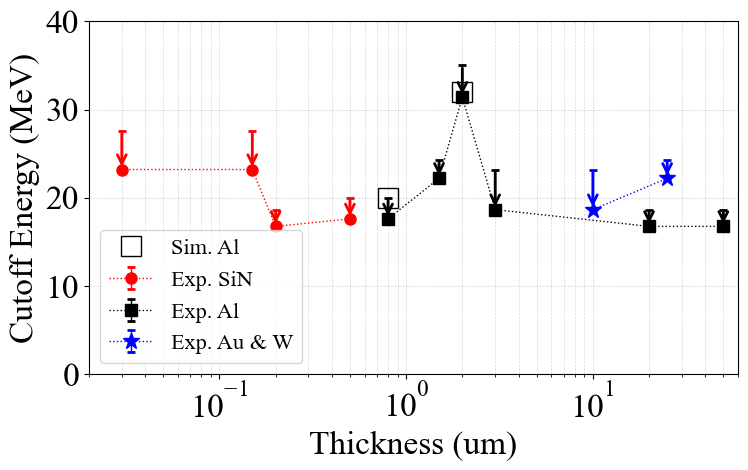

In [6]:
# Set font to Calibri and increase font sizes
plt.rcParams.update({
    # 'font.family': 'Calibri',
    'font.size': 24,
    'axes.titlesize': 28,
    'axes.labelsize': 24,
    'legend.fontsize': 16,
    'xtick.labelsize': 24,
    'ytick.labelsize': 24
})

# Create the plot
plt.figure(figsize=(8, 5))
plt.errorbar(thickness_SiN*1e-3, cutoff_energy_SiN, yerr=yerr_SiN,
             capsize=3,capthick=2,
         marker='o', linestyle=':',
         linewidth=1, markersize=8, color='red', label="Exp. SiN")

# Add arrowheads manually
for x, y, err in zip(thickness_SiN*1e-3, cutoff_energy_SiN, err_SiN):
    plt.annotate(
        '', xy=(x, y + err), xytext=(x, y),
        arrowprops=dict(arrowstyle='<-', color='red', lw=2,  mutation_scale=16)
    )

plt.errorbar(thickness_Al*1e-3, cutoff_energy_Al, yerr=yerr_Al,
            capsize=3,capthick=2, 
         marker='s', linestyle=':',
         linewidth=1, markersize=8, color='k', label="Exp. Al")

# Add arrowheads manually
for x, y, err in zip(thickness_Al*1e-3, cutoff_energy_Al, err_Al):
    plt.annotate(
        '', xy=(x, y + err), xytext=(x, y),
        arrowprops=dict(arrowstyle='<-', color='k', lw=2,  mutation_scale=16)
    )


plt.errorbar(thickness_Au*1e-3, cutoff_energy_Au, yerr=yerr_Au,
         capsize=3,capthick=2,
         marker='*', linestyle=':',
         linewidth=1, markersize=12, color='blue', label="Exp. Au & W")

# Add arrowheads manually
for x, y, err in zip(thickness_Au*1e-3, cutoff_energy_Au, err_Au):
    plt.annotate(
        '', xy=(x, y + err), xytext=(x, y),
        arrowprops=dict(arrowstyle='<-', color='blue', lw=2, mutation_scale=16)
    )

plt.plot([0.8, 2], [20,32], 
         marker='s', linestyle='',
         markerfacecolor='none',
         markersize=14,
         color='k', label='Sim. Al')

plt.xlabel("Thickness (um)")
plt.ylabel("Cutoff Energy (MeV)")
plt.legend(loc='lower left')
plt.tight_layout()
plt.xscale('log')
plt.xlim(0.02, 60)
plt.ylim(0, 40)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
# plt.show()
plt.savefig("/Users/yao/Desktop/thickness_vs_cutoff_energy.pdf", dpi=600, bbox_inches='tight')

In [7]:
# proton energy spectra

# load apollon data
## w/o DPM - 1.5 um Al
#shot 193
exp_energy_193  = np.array([4.71,    7.76,   10.01,  12.64,  14.78,  16.70,  18.97,  20.89,  22.55,  24.00,  25.25]) 
exp_number_193  = np.array([6.79e9, 4.92e9, 2.51e9, 1.39e9, 4.73e8, 3.53e8, 9.26e7, 5.53e7, 4.00e7, 2.91e7, 2.15e7]) 

#shot 194
exp_energy_194  = np.array([4.83,    7.90,   10.16,  12.79,  14.92,  16.82,  19.07,  20.95,  22.58,  24.01,  25.25]) 
exp_number_194  = np.array([5.78e9, 4.54e9, 1.63e9, 9.77e8, 6.50e8, 4.35e8, 2.09e8, 7.92e7, 5.43e7, 4.37e7, 3.35e7]) 

exp_energy_nodpm = np.mean(np.stack((exp_energy_193, exp_energy_194)), axis=0)
exp_energy_nodpm_xerr_min = np.stack((exp_energy_193, exp_energy_194)).min(axis=0)
exp_energy_nodpm_xerr_max = np.stack((exp_energy_193, exp_energy_194)).max(axis=0)
exp_energy_nodpm_xerr = np.stack((np.abs(exp_energy_nodpm_xerr_min - exp_energy_nodpm), 
                                  np.abs(exp_energy_nodpm_xerr_max - exp_energy_nodpm))
                                ).min(axis=0)

exp_number_nodpm = np.mean(np.stack((exp_number_193, exp_number_194)), axis=0)
exp_number_nodpm_yerr_min = np.stack((exp_number_193, exp_number_194)).min(axis=0)
exp_number_nodpm_yerr_max = np.stack((exp_number_193, exp_number_194)).max(axis=0)
exp_number_nodpm_yerr = np.stack((np.abs(exp_number_nodpm_yerr_min - exp_number_nodpm), 
                                  np.abs(exp_number_nodpm_yerr_max - exp_number_nodpm))
                                ).min(axis=0)

## with DPM - 200 nm Si + 50 nm Al
# #shot 115
# exp_energy_115 = np.array([4.47, 7.42, 9.55, 11.92, 13.71, 15.12])
# exp_number_115 = np.array([2.263e9, 1.185e9, 5.523e8, 1.790e8, 5.399e7, 3.149e7])

#shot 56
exp_energy_56  = np.array([4.9,         8.0,    10.3,    13.0,    15.1,    17.1,    19.5,    21.5,    23.4,    25.0,    26.5,    28.1,    29.5,   30.9,   33.67,   35.17]) 
exp_number_56  = np.array([2.71e9,   2.29e9,  1.30e9,  8.10e8,  6.20e8,  2.78e8,  2.53e8,  1.10e8,  7.93e7,  5.87e7,  3.91e7,  1.96e7,  1.25e7, 1.01e7, 5.565e6, 5.165e6]) 

#shot 111
exp_energy_111 = np.array([4.49,       7.74,   10.01,   12.67,   14.87,   16.88,   19.33,   21.47,   23.42,   25.23,   26.90,   28.75,   30.37,   32.03,   33.67,   35.17])
exp_number_111 = np.array([4.333e9, 4.103e9, 2.892e9, 1.386e9, 1.074e9, 4.606e8, 2.639e8, 1.605e8, 9.902e7, 7.454e7, 4.993e7, 2.849e7, 2.184e7, 1.170e7, 5.565e6, 5.165e6])

#shot 112
exp_energy_112 = np.array([4.76,       7.83,   10.10,   12.76,   14.95,   16.94,   19.34,   21.41,   23.26,   24.95,   26.48,   28.14,   29.57,   30.95,   33.67,   35.17])
exp_number_112 = np.array([3.252e9, 2.844e9, 1.888e9, 1.286e9, 8.366e8, 3.199e8, 2.005e8, 1.081e8, 6.068e7, 3.840e7, 3.108e7, 1.871e7, 1.021e7, 1.428e7, 5.565e6, 5.165e6])

# #shot 216
# exp_energy_216  = np.array([4.54,      7.53,    9.73,   12.27,    14.3,   16.05,   17.99,   19.48,]) 
# exp_number_216  = np.array([2.25e9,  1.36e9,  7.65e8,  2.76e8,  1.01e8,  5.01e7,  1.74e7,  1.20e7,]) 

exp_energy_dpm_data     = np.stack((exp_energy_56, exp_energy_111, exp_energy_112))
exp_energy_dpm          = np.mean(exp_energy_dpm_data, axis=0)
exp_energy_dpm_xerr_min = exp_energy_dpm_data.min(axis=0)
exp_energy_dpm_xerr_max = exp_energy_dpm_data.max(axis=0)
exp_energy_dpm_xerr     = np.stack((np.abs(exp_energy_dpm_xerr_min - exp_energy_dpm), 
                                    np.abs(exp_energy_dpm_xerr_max - exp_energy_dpm))
                                  ).min(axis=0)

exp_number_dpm_data     = np.stack((exp_number_56, exp_number_111, exp_number_112))
exp_number_dpm          = np.mean(exp_number_dpm_data, axis=0)
exp_number_dpm_yerr_min = exp_number_dpm_data.min(axis=0)
exp_number_dpm_yerr_max = exp_number_dpm_data.max(axis=0)
exp_number_dpm_yerr     = np.stack((np.abs(exp_number_dpm_yerr_min - exp_number_dpm), 
                                    np.abs(exp_number_dpm_yerr_max - exp_number_dpm))
                                  ).min(axis=0)

In [8]:
# load ELI new data

filedir = "/Users/yao/Nextcloud/PROJECTS/ELI/Xray-April2025/proton_spectra/"

shot16 = np.loadtxt(filedir+"shot16_30nm_SiN/DN_DE_16.txt")  # Update this path if necessary
shot17 = np.loadtxt(filedir+"shot17_150nm_SiN/DN_DE_17.txt")  # Update this path if necessary
shot19 = np.loadtxt(filedir+"shot19_2um_Au/DN_DE.txt")
shot20 = np.loadtxt(filedir+"shot20_10um_Au/DN_DE_20.txt")      # Update this path if necessary
shot43 = np.loadtxt(filedir+"shot43_500nm_SiN/DN_DE_43.txt")      # Update this path if necessary

# get rid of the clearly missed RCF layer data on 04/05/2025
shot16 = np.delete(shot16, 7, axis=0)
shot20 = np.delete(shot20, 7, axis=0)

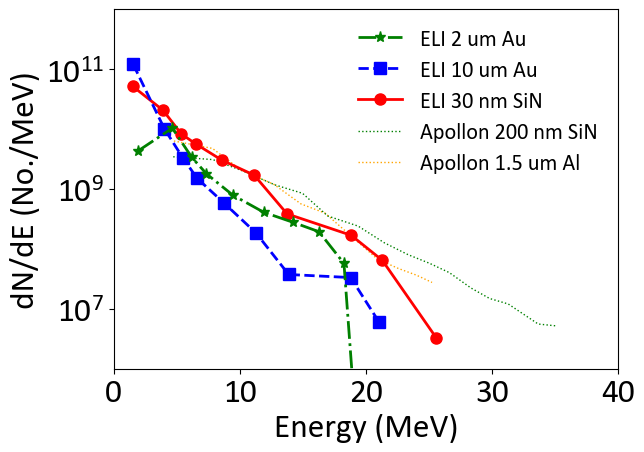

In [8]:
width  = 3.487 * 2
height = width / 1.618 * 1.2

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

# experiment
ax.plot(exp_energy_nodpm, exp_number_nodpm,
        linestyle=':', linewidth=1,
        # marker='s', markersize=8, 
        color='orange',
        label='Apollon 1.5 um Al')

ax.plot(exp_energy_dpm, exp_number_dpm,
        linestyle=':', linewidth=1,
        # marker='s', markersize=8, 
        color='green',
        label='Apollon 200 nm SiN')

# ax.errorbar(exp_energy_nodpm, exp_number_nodpm, 
#             yerr=exp_number_nodpm_yerr, 
#             xerr=exp_energy_nodpm_xerr,
#             fmt='.b',markersize=6,
#             mfc='none',
#             ecolor='b',elinewidth=1.0,
#             capsize=2.0, capthick = 1.0,
#             label='Apollon 1.5 um Al' 
#            )
ax.set_yscale('log')


# ax.errorbar(exp_energy_dpm, exp_number_dpm, 
#             yerr=exp_number_dpm_yerr, 
#             xerr=exp_energy_dpm_xerr,
#             fmt='.r',markersize=4,
#             mfc='none',mew=1.0,
#             ecolor='r',elinewidth=1.0,
#             capsize=2.0, capthick = 1.0,
#             label='Apollon 200 nm SiN'
#            )

ax.plot(shot16[:,1], shot16[:,0],
        linestyle='-', marker='o', markersize=8, color='red',
        linewidth=2,
        label='ELI 30 nm SiN')


ax.plot(shot20[:,1], shot20[:,0],
        linestyle='--', marker='s', markersize=8, color='blue',
        linewidth=2,
        label='ELI 10 um Au')

ax.plot(shot19[:,1], shot19[:,0],
        linestyle='-.', marker='*', markersize=8, color='green',
        linewidth=2,
        label='ELI 2 um Au')




ax.set_xlim([0,40])
ax.set_ylim([1e6,1e12])
# ax.grid(linestyle='--',alpha=0.5)
ax.set_xlabel('Energy (MeV)')
ax.set_ylabel('dN/dE (No./MeV)')
ax.legend(fancybox=False, reverse=True, frameon=False)
fig.set_size_inches(width, height)
fig.tight_layout()

# plt.show()

# plt.savefig("/Users/yao/Desktop/energy_spectra.pdf", dpi=300, bbox_inches='tight')



In [9]:
## prepare simulation data

wkdir = [
     '/Users/yao/Documents/Data/ELI2025/eli_Sep05_2um/', # plot for the manuscript
     '/Users/yao/Documents/Data/ELI2025/eli_Sep05_0.8um/', # plot for the manuscript
    #  '/Users/yao/Desktop/eli_sep19_30nm_2D/', # check how the e-spec from the sim. match the exp.
    ]

S0 = happi.Open(wkdir[0], reference_angular_frequency_SI = 2.0*np.pi*3e8/(0.810*1e-6))
S1 = happi.Open(wkdir[1], reference_angular_frequency_SI = 2.0*np.pi*3e8/(0.810*1e-6))


I_0 = 1.5e+21 W/cm2
a_0 =  26.88270100135983
Loaded simulation '/Users/yao/Documents/Data/ELI2025/eli_Sep05_2um/'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Scanning for new particle diagnostics
I_0 = 1.5e+21 W/cm2
a_0 =  26.88270100135983
Loaded simulation '/Users/yao/Documents/Data/ELI2025/eli_Sep05_0.8um/'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Scanning for new particle diagnostics


In [10]:
# get the simulated proton energy spectra data out

num0 = np.array(S0.ParticleBinning(6, units=['fs','um','1/cm^3','MeV'],).getData()[-15])
ekin0 = np.array(S0.ParticleBinning(6, units=['fs','um','1/cm^3','MeV'],).getAxis('ekin'))

num1 = np.array(S1.ParticleBinning(6, units=['fs','um','1/cm^3','MeV'],).getData()[-15])
ekin1 = np.array(S1.ParticleBinning(6, units=['fs','um','1/cm^3','MeV'],).getAxis('ekin'))

In [11]:
# get the simulated electron energy spectra data out

nume0 = np.array(S0.Screen(0, units=['fs','um','1/cm^3','MeV'],).getData()[-1])
ekine0 = np.array(S0.Screen(0, units=['fs','um','1/cm^3','MeV'],).getAxis('ekin'))

nume1 = np.array(S1.Screen(0, units=['fs','um','1/cm^3','MeV'],).getData()[-1])
ekine1 = np.array(S1.Screen(0, units=['fs','um','1/cm^3','MeV'],).getAxis('ekin'))

In [12]:
# save the data if you need to deal with X-ray estimate

np.savetxt("/Users/yao/Desktop/p_spectrum_2um_num.txt", num0*3e13)
np.savetxt("/Users/yao/Desktop/p_spectrum_2um_ene.txt", ekin0)

np.savetxt("/Users/yao/Desktop/p_spectrum_0.8um_num.txt", num1*3e13)
np.savetxt("/Users/yao/Desktop/p_spectrum_0.8um_ene.txt", ekin1)

np.savetxt("/Users/yao/Desktop/e_spectrum_2um_num.txt", nume0*3e13)
np.savetxt("/Users/yao/Desktop/e_spectrum_2um_ene.txt", ekine0)

np.savetxt("/Users/yao/Desktop/e_spectrum_0.8um_num.txt", nume1*3e13)
np.savetxt("/Users/yao/Desktop/e_spectrum_0.8um_ene.txt", ekine1)

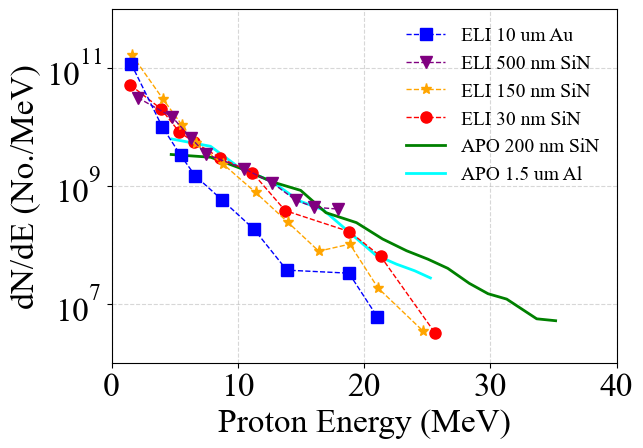

In [28]:
width  = 3.487 * 2.
height = width / 1.618 * 1.2

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

# ax.plot(ekin0[::5], num0[::5]*3e13,
#         linestyle='-', 
#         # marker='^', markersize=8, 
#         color='grey',
#         linewidth=2,
#         label='Sim 2 um Al')

# ax.plot(ekin1[::5], num1[::5]*3e13,
#         linestyle='-', 
#         # marker='^', markersize=8, 
#         color='black',
#         linewidth=2,
#         label='Sim 0.8 um Al')

# experiment
ax.plot(exp_energy_nodpm, exp_number_nodpm,
        linestyle='-', linewidth=2,
        # marker='s', markersize=8, 
        color='cyan',
        label='APO 1.5 um Al')

ax.plot(exp_energy_dpm, exp_number_dpm,
        linestyle='-', linewidth=2,
        # marker='s', markersize=8, 
        color='green',
        label='APO 200 nm SiN')

ax.set_yscale('log')

ax.plot(shot16[:,1], shot16[:,0],
        linestyle='--', marker='o', markersize=8, color='red',
        linewidth=1,
        label='ELI 30 nm SiN')

ax.plot(shot17[:,1], shot17[:,0],
        linestyle='--', marker='*', markersize=8, color='orange',
        linewidth=1,
        label='ELI 150 nm SiN')

ax.plot(shot43[:,1], shot43[:,0],
        linestyle='--', marker='v', markersize=8, color='purple',
        linewidth=1,
        label='ELI 500 nm SiN')


ax.plot(shot20[:,1], shot20[:,0],
        linestyle='--', marker='s', markersize=8, color='blue',
        linewidth=1,
        label='ELI 10 um Au')



# ax.plot(ekin1[::5], num1[::5]*1e14,
#         linestyle='-', 
#         # marker='^', markersize=8, 
#         color='cyan',
#         linewidth=2,
#         label='PIC Simu. for 30 nm SiN')

# ax.plot(ekin2[::5], num2[::5]*1e14,
#         linestyle='-', 
#         # marker='^', markersize=8, 
#         color='magenta',
#         linewidth=2,
#         label='PIC Simu. for 500 nm SiN')


ax.set_xlim([0,40])
ax.set_ylim([1e6,1e12])
ax.grid(linestyle='--',alpha=0.5)
ax.set_xlabel('Proton Energy (MeV)')
ax.set_ylabel('dN/dE (No./MeV)')
ax.legend(fancybox=False, reverse=True, frameon=False,fontsize=14)
fig.set_size_inches(width, height)
fig.tight_layout()

# plt.show()

plt.savefig("/Users/yao/Desktop/energy_spectra.pdf", dpi=600, bbox_inches='tight')



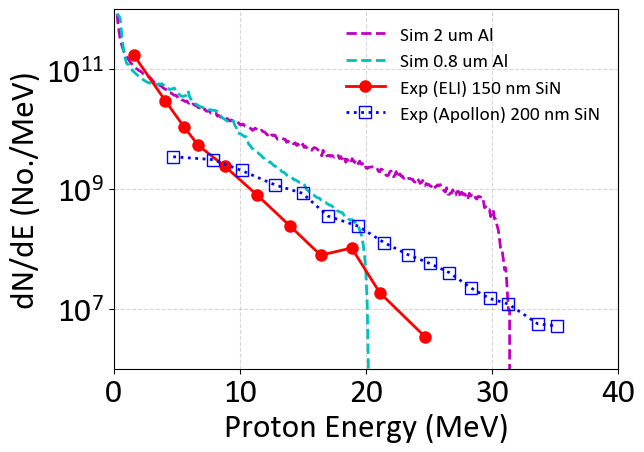

In [99]:
width  = 3.487 * 2
height = width / 1.618 * 1.2

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

ax.plot(ekin0[::10], num0[::10]*6e14,
        linestyle='--', 
        # marker='^', markersize=8, 
        color='m',
        linewidth=2,
        label='Sim 2 um Al')

ax.plot(ekin1[::10], num1[::10]*4e14,
        linestyle='--', 
        # marker='^', markersize=8, 
        color='c',
        linewidth=2,
        label='Sim 0.8 um Al')

ax.set_yscale('log')

# ax.plot(shot16[:,1], shot16[:,0],
#         linestyle='-', marker='o', markersize=8, color='red',
#         linewidth=2,
#         label='Exp 30 nm SiN')

ax.plot(shot17[:,1], shot17[:,0],
        linestyle='-', marker='o', markersize=8, color='red',
        linewidth=2,
        label='Exp (ELI) 150 nm SiN')

# ax.plot(shot43[:,1], shot43[:,0],
#         linestyle='-', marker='v', markersize=8, color='purple',
#         linewidth=2,
#         label='EXP 500 nm SiN')


# ax.plot(shot20[:,1], shot20[:,0],
#         linestyle='-', marker='s', markersize=8, color='blue',
#         linewidth=2,
#         label='Exp 10 um Au')

# ax.plot(exp_energy_nodpm, exp_number_nodpm,
#         linestyle=':', linewidth=2,
#         marker='s', markersize=8, 
#         markerfacecolor='none',
#         color='blue',
#         label='Exp (Apollon) 1.5 um Al')

ax.plot(exp_energy_dpm, exp_number_dpm,
        linestyle=':', linewidth=2,
        marker='s', markersize=8, 
        markerfacecolor='none',
        color='blue',
        label='Exp (Apollon) 200 nm SiN')



ax.set_xlim([0,40])
ax.set_ylim([1e6,1e12])
ax.grid(linestyle='--',alpha=0.5)
ax.set_xlabel('Proton Energy (MeV)')
ax.set_ylabel('dN/dE (No./MeV)')
ax.legend(fancybox=False, reverse=False, frameon=False,fontsize=14,alignment="right")
# leg = plt.legend(loc="upper right", frameon=True,alignment="right")

# # Right-align legend texts
# for text in leg.get_texts():
#     text.set_ha("right")
# #     text.set_fontfamily("monospace")

fig.set_size_inches(width, height)
fig.tight_layout()

# plt.show()

plt.savefig("/Users/yao/Desktop/energy_spectra.pdf", dpi=600, bbox_inches='tight')



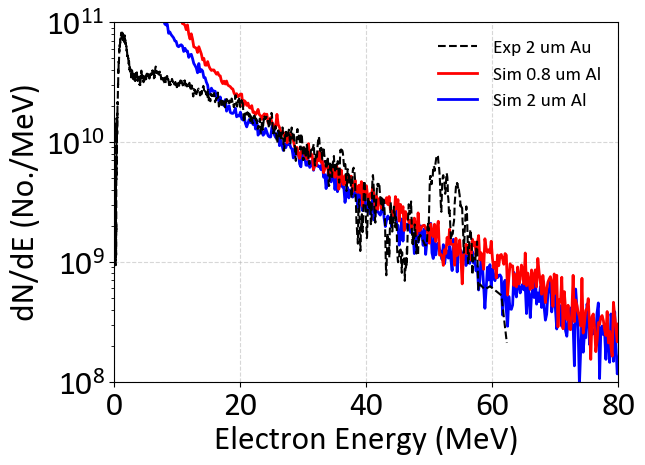

In [114]:
width  = 3.487 * 2
height = width / 1.618 * 1.2

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

factor = 1e15

ax.plot(ekine0[::20], nume0[::20]*factor,
        linestyle='-', 
        # marker='^', markersize=8, 
        color='blue',
        linewidth=2,
        label='Sim 2 um Al')

ax.plot(ekine1[::20], nume1[::20]*factor,
        linestyle='-', 
        # marker='^', markersize=8, 
        color='red',
        linewidth=2,
        label='Sim 0.8 um Al')

ax.set_yscale('log')

# ax.plot(ene105, num105, linestyle='-', color='green', label="Exp 30 nm")
# ax.plot(ene102, num102, linestyle='-', color='cyan', label="Exp 150 nm")
ax.plot(ene8081, num8081, linestyle='--', color='black', label="Exp 2 um Au")
# ax.plot(ene7879, num7879, linestyle='-', color='purple', label="Exp 3 um Au")
# ax.plot(ene7273, num7273, linestyle='-', color='brown', label="#72-73, 10 um Au")
# ax.plot(ene7475, num7475, linestyle='-', color='black', label="#74-75, 25 um W")
# ax.plot(ene7677, num7677, linestyle='-', color='grey', label="#76-77, 50 um Au")


# plt.xlim(0, 60)
# plt.ylim(1e8, 2e11)



ax.set_xlim([0,80])
ax.set_ylim([1e8,1e11])
ax.grid(linestyle='--',alpha=0.5)
ax.set_xlabel('Electron Energy (MeV)')
ax.set_ylabel('dN/dE (No./MeV)')
ax.legend(fancybox=False, reverse=True, frameon=False, fontsize=14)
fig.set_size_inches(width, height)
fig.tight_layout()

# plt.show()

plt.savefig("/Users/yao/Desktop/e_spectra.pdf", dpi=600, bbox_inches='tight')



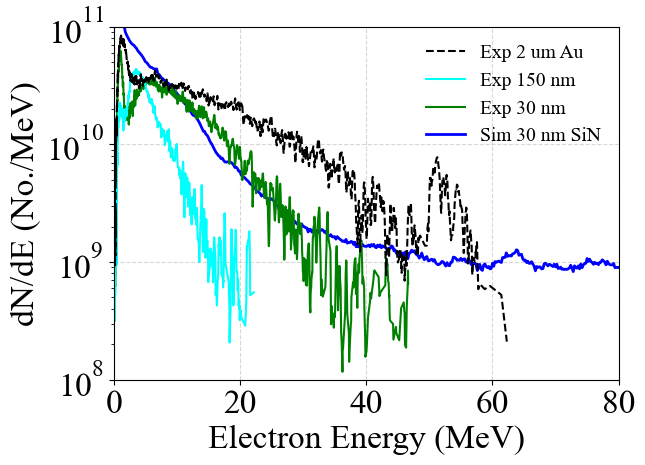

In [10]:
## compare e-spec of sim. vs. exp.

width  = 3.487 * 2
height = width / 1.618 * 1.2

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

factor = 1e15

ax.plot(ekine0[::20], nume0[::20]*factor,
        linestyle='-', 
        # marker='^', markersize=8, 
        color='blue',
        linewidth=2,
        label='Sim 30 nm SiN')

# ax.plot(ekine1[::20], nume1[::20]*factor,
#         linestyle='-', 
#         # marker='^', markersize=8, 
#         color='red',
#         linewidth=2,
#         label='Sim 0.8 um Al')

ax.set_yscale('log')

ax.plot(ene105, num105, linestyle='-', color='green', label="Exp 30 nm")
ax.plot(ene102, num102, linestyle='-', color='cyan', label="Exp 150 nm")
ax.plot(ene8081, num8081, linestyle='--', color='black', label="Exp 2 um Au")
# ax.plot(ene7879, num7879, linestyle='-', color='purple', label="Exp 3 um Au")
# ax.plot(ene7273, num7273, linestyle='-', color='brown', label="#72-73, 10 um Au")
# ax.plot(ene7475, num7475, linestyle='-', color='black', label="#74-75, 25 um W")
# ax.plot(ene7677, num7677, linestyle='-', color='grey', label="#76-77, 50 um Au")


# plt.xlim(0, 60)
# plt.ylim(1e8, 2e11)



ax.set_xlim([0,80])
ax.set_ylim([1e8,1e11])
ax.grid(linestyle='--',alpha=0.5)
ax.set_xlabel('Electron Energy (MeV)')
ax.set_ylabel('dN/dE (No./MeV)')
ax.legend(fancybox=False, reverse=True, frameon=False, fontsize=14)
fig.set_size_inches(width, height)
fig.tight_layout()

plt.show()

# plt.savefig("/Users/yao/Desktop/e_spectra.pdf", dpi=600, bbox_inches='tight')

